In [1]:
import csv
import pandas as pd

Value in column funds are written as dollar currency. However this data will use for machine learning model for scholarship in Indonesia then we should convert it to Rupiah by multiply it to the latest currency.

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/Namirachmi/capstone2023/machine-learning/Scholarship_dataset.csv')
df.head()

,scholarship_program_name,promoter,funds,region,race,gpa,religion,major_study,gpa_status,identity,...,essay,high_school,senior_high_school,undergraduate,high_school-undergraduate,senior_high_school-undergraduate,undergraduate-graduate,graduate,any,education_level
0,Curry & C/O '22 Scholarship,Kimora Jane Curry,500,All USA States,NaN,0.0,Public,Any,False,All gender,...,True,False,True,False,False,False,False,False,False,Senior High School
1,Jared Ethan Trueba Memorial Scholarship,The Trueba Family,500,All USA States,NaN,0.0,Public,Any,False,All gender,...,True,True,False,False,False,False,False,False,False,High School
2,Linda Hicks Memorial Scholarship,Calvin Hicks and Tanya Minor,1000,All USA States,African American,0.0,Public,Any,False,All gender,...,True,False,False,True,False,False,False,False,False,Undergraduate
3,Nitro No-Essay Scholarship,Nitro College,2000,All USA States,NaN,0.0,Public,Any,False,All gender,...,False,False,False,False,False,False,False,False,True,Any
4,Niche No-Essay Scholarship,Niche,2000,All USA States,NaN,0.0,Public,Any,False,All gender,...,False,False,False,False,False,False,False,False,True,Any


In [5]:
print(f"The Dataset have {df.shape[0]} row and {df.shape[1]} column")
df.dtypes

The Dataset have 506 row and 28 column


scholarship_program_name             object
promoter                             object
funds                                 int64
region                               object
race                                 object
gpa                                 float64
religion                             object
major_study                          object
gpa_status                             bool
identity                             object
underrepresented_minority              bool
volunteering                           bool
first_generation                       bool
parental_status                      object
enrollment_pattern                   object
low_income                             bool
background                           object
total_awardee                         int64
essay                                  bool
high_school                            bool
senior_high_school                     bool
undergraduate                          bool
high_school-undergraduate       

## Step 1 : Let's checking the data types for every column.

There are six column with boolean value : underrepresented_minority, volunteering, first_generation, low_income, and essay.  
If we look closely there is one column with false data types. It was the funds column supposed to be float insetad of integer.
  
So let's fix it!

In [60]:
#fixing funds column
df['funds'] = df['funds'].astype('float64')

In [7]:
df.head()

,scholarship_program_name,promoter,funds,region,race,gpa,religion,major_study,gpa_status,identity,...,essay,high_school,senior_high_school,undergraduate,high_school-undergraduate,senior_high_school-undergraduate,undergraduate-graduate,graduate,any,education_level
0,Curry & C/O '22 Scholarship,Kimora Jane Curry,500.0,All USA States,NaN,0.0,Public,Any,False,All gender,...,True,False,True,False,False,False,False,False,False,Senior High School
1,Jared Ethan Trueba Memorial Scholarship,The Trueba Family,500.0,All USA States,NaN,0.0,Public,Any,False,All gender,...,True,True,False,False,False,False,False,False,False,High School
2,Linda Hicks Memorial Scholarship,Calvin Hicks and Tanya Minor,1000.0,All USA States,African American,0.0,Public,Any,False,All gender,...,True,False,False,True,False,False,False,False,False,Undergraduate
3,Nitro No-Essay Scholarship,Nitro College,2000.0,All USA States,NaN,0.0,Public,Any,False,All gender,...,False,False,False,False,False,False,False,False,True,Any
4,Niche No-Essay Scholarship,Niche,2000.0,All USA States,NaN,0.0,Public,Any,False,All gender,...,False,False,False,False,False,False,False,False,True,Any


In [8]:
#Now let's check it again if all the column have the right data types
print(df.dtypes)

scholarship_program_name             object
promoter                             object
funds                               float64
region                               object
race                                 object
gpa                                 float64
religion                             object
major_study                          object
gpa_status                             bool
identity                             object
underrepresented_minority              bool
volunteering                           bool
first_generation                       bool
parental_status                      object
enrollment_pattern                   object
low_income                             bool
background                           object
total_awardee                         int64
essay                                  bool
high_school                            bool
senior_high_school                     bool
undergraduate                          bool
high_school-undergraduate       

## Step 2 : Let's selecting the column that relatable

Since the data was scraping from Bold which is a scholarship for only USA Citizen. We have to select a column that will be usefull and related with Indonesia. 

Column race and region are not related, since the geography is different. Hence let's drop those two column.

Not only that, column major and background is not really necessary so we will drop it.

In [61]:
df.drop(['region', 'race', 'major_study', 'background'], inplace=True, axis=1)

In [10]:
column_name = df.columns.values
print(column_name)

['scholarship_program_name' 'promoter' 'funds' 'gpa' 'religion'
 'gpa_status' 'identity' 'underrepresented_minority' 'volunteering'
 'first_generation' 'parental_status' 'enrollment_pattern' 'low_income'
 'total_awardee' 'essay' 'high_school' 'senior_high_school'
 'undergraduate' 'high_school-undergraduate'
 'senior_high_school-undergraduate' 'undergraduate-graduate' 'graduate'
 'any' 'education_level']


In [11]:
#print(column_name[3:])

for i in column_name[3:] :
    print(f"\n{i} values =")
    print(df[i].unique())


gpa values =
[0.   3.   3.3  2.7  2.8  3.75 2.5  3.5  3.2  2.   3.6  2.9  2.75 3.4 ]

religion values =
['Public' 'Islam' 'Jewish' 'Catholic']

gpa_status values =
[False  True]

identity values =
['All gender' 'Female' 'LGBTQ+' 'Male' 'LGBTQIA+']

underrepresented_minority values =
[False  True]

volunteering values =
[False  True]

first_generation values =
[False  True]

parental_status values =
['Together' 'Single mother' 'Guardian parent' 'Single parent family'
 'Single mother family' 'Single parent child' 'Single parent']

enrollment_pattern values =
['Traditional Student' 'Nontraditional student']

low_income values =
[False  True]

total_awardee values =
[ 1  4  2  5  3  6 12 25 10]

essay values =
[ True False]

high_school values =
[False  True]

senior_high_school values =
[ True False]

undergraduate values =
[False  True]

high_school-undergraduate values =
[False  True]

senior_high_school-undergraduate values =
[False  True]

undergraduate-graduate values =
[False  True

### Let's check if there is a row with null value in it!

In [12]:
df.isnull().sum().sort_values(ascending=False)

scholarship_program_name            0
promoter                            0
any                                 0
graduate                            0
undergraduate-graduate              0
senior_high_school-undergraduate    0
high_school-undergraduate           0
undergraduate                       0
senior_high_school                  0
high_school                         0
essay                               0
total_awardee                       0
low_income                          0
enrollment_pattern                  0
parental_status                     0
first_generation                    0
volunteering                        0
underrepresented_minority           0
identity                            0
gpa_status                          0
religion                            0
gpa                                 0
funds                               0
education_level                     0
dtype: int64

## Step 3 : Let's checking values that still relateable

In column identity which listing a value about gender that can applying the scholarship. You may look that there are value LGBTQ+ and LGBTQIA+. Unfortunately, in Indonesia only two gender acknowleged, female and male. Hence, we have to drop columns with LGBTQ+ and LGBTQIA+ values on identity column.

In [62]:
identity_filter = df[ (df['identity'] == 'LGBTQ+') | (df['identity'] == 'LGBTQIA+')].index

df.drop(identity_filter, inplace=True)

#Checking the total row after filtering
print(f"After filtering, the dataframe has {df.shape[0]} row in total")

After filtering, the dataframe has 496 row in total


In [14]:
import numpy as np

In [63]:
funds_in_rupiah = df['funds'].values

df['funds'] = np.dot(funds_in_rupiah, 13000)
df.head()

,scholarship_program_name,promoter,funds,gpa,religion,gpa_status,identity,underrepresented_minority,volunteering,first_generation,...,essay,high_school,senior_high_school,undergraduate,high_school-undergraduate,senior_high_school-undergraduate,undergraduate-graduate,graduate,any,education_level
0,Curry & C/O '22 Scholarship,Kimora Jane Curry,6500000.0,0.0,Public,False,All gender,False,False,False,...,True,False,True,False,False,False,False,False,False,Senior High School
1,Jared Ethan Trueba Memorial Scholarship,The Trueba Family,6500000.0,0.0,Public,False,All gender,False,False,False,...,True,True,False,False,False,False,False,False,False,High School
2,Linda Hicks Memorial Scholarship,Calvin Hicks and Tanya Minor,13000000.0,0.0,Public,False,All gender,False,False,False,...,True,False,False,True,False,False,False,False,False,Undergraduate
3,Nitro No-Essay Scholarship,Nitro College,26000000.0,0.0,Public,False,All gender,False,False,False,...,False,False,False,False,False,False,False,False,True,Any
4,Niche No-Essay Scholarship,Niche,26000000.0,0.0,Public,False,All gender,False,False,False,...,False,False,False,False,False,False,False,False,True,Any


## Step 4 : Let's convert some columns from categorical into numerical data (Ordinal Encoding)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [64]:
#selecting the column
col_encd = (df.iloc[:, 4:]).columns.values

#create a list to save the selecting column name
arr_enc = []

for i in col_encd :
  arr_enc.append(i)

#Transforming into oridnal
col_ord_enc = df[arr_enc].apply(LabelEncoder().fit_transform)
col_ord_enc.head()

,religion,gpa_status,identity,underrepresented_minority,volunteering,first_generation,parental_status,enrollment_pattern,low_income,total_awardee,essay,high_school,senior_high_school,undergraduate,high_school-undergraduate,senior_high_school-undergraduate,undergraduate-graduate,graduate,any,education_level
0,3,0,0,0,0,0,6,1,0,0,1,0,1,0,0,0,0,0,0,4
1,3,0,0,0,0,0,6,1,0,0,1,1,0,0,0,0,0,0,0,2
2,3,0,0,0,0,0,6,1,0,0,1,0,0,1,0,0,0,0,0,6
3,3,0,0,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3,0,0,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#religion, gpa_status, identity, underrepresented_minority, 
#volunteering, first_generation, parental_status, enrollment_pattern, 
#low_income, total_awardee, essay, high_school, senior_high_school, 
#undergraduate, high_school-undergraduate, senior_high_school-undergraduate, 
#undergraduate-graduate, graduate, any, education_level

In [65]:
#Combining the selected column into the original dataframe
for col, val in zip(arr_enc, col_ord_enc):
  df[col] = col_ord_enc[val]

df.head()

,scholarship_program_name,promoter,funds,gpa,religion,gpa_status,identity,underrepresented_minority,volunteering,first_generation,...,essay,high_school,senior_high_school,undergraduate,high_school-undergraduate,senior_high_school-undergraduate,undergraduate-graduate,graduate,any,education_level
0,Curry & C/O '22 Scholarship,Kimora Jane Curry,6500000.0,0.0,3,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,4
1,Jared Ethan Trueba Memorial Scholarship,The Trueba Family,6500000.0,0.0,3,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
2,Linda Hicks Memorial Scholarship,Calvin Hicks and Tanya Minor,13000000.0,0.0,3,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,6
3,Nitro No-Essay Scholarship,Nitro College,26000000.0,0.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Niche No-Essay Scholarship,Niche,26000000.0,0.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Since column funds have too big values (in million) then we have to scaling it, so their values is in the same range with others columns

In [66]:
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt   
import seaborn as sns

In [67]:
#defining column funds
col_funds = df['funds'].values.reshape(-1, 1)

#scalling
scaler = MaxAbsScaler()
scale_col_funds = scaler.fit_transform(col_funds)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(col_funds,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(scale_col_funds,axis=0)}")

Peak to Peak range by column in Raw        X:[4.225e+08]
Peak to Peak range by column in Normalized X:[0.98484848]


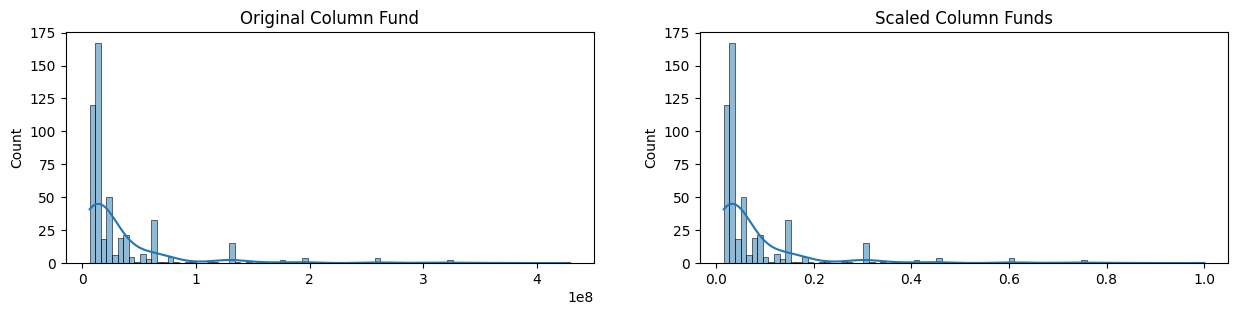

In [68]:
# Comparing the original column funds vs scaled column funds
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(col_funds, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Column Fund")
sns.histplot(scale_col_funds, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled Column Funds")
plt.show()

In [73]:
df['funds'] = scale_col_funds
df.head()

,scholarship_program_name,promoter,funds,gpa,religion,gpa_status,identity,underrepresented_minority,volunteering,first_generation,...,essay,high_school,senior_high_school,undergraduate,high_school-undergraduate,senior_high_school-undergraduate,undergraduate-graduate,graduate,any,education_level
0,Curry & C/O '22 Scholarship,Kimora Jane Curry,0.015152,0.0,3,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,4
1,Jared Ethan Trueba Memorial Scholarship,The Trueba Family,0.015152,0.0,3,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
2,Linda Hicks Memorial Scholarship,Calvin Hicks and Tanya Minor,0.030303,0.0,3,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,6
3,Nitro No-Essay Scholarship,Nitro College,0.060606,0.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Niche No-Essay Scholarship,Niche,0.060606,0.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
ordinal_encod = OrdinalEncoder(dtype=int)

gpastatus_enc = df['gpa_status'].values.reshape(-1, 1)
ordinal_encod.fit(gpastatus_enc)
df_gpastatus_ord = ordinal_encod.transform(gpastatus_enc)

df_encod = df.assign(gpa_status=df_gpastatus_ord)
df_encod.head(15)

,scholarship_program_name,promoter,funds,education_level,religion,major_study,gpa,gpa_status,identity,underrepresented_minority,...,first_generation,parental_status,enrollment_pattern,low_income,background,total_awardee,deadline,essay,funding_type,scholarship_status
0,Curry & C/O '22 Scholarship,Kimora Jane Curry,6500000.0,Senior High School,Public,Any,0.0,0,All gender,False,...,False,Together,Traditional Student,False,None,1,2023-08-15,True,Donor,Open
1,Jared Ethan Trueba Memorial Scholarship,The Trueba Family,6500000.0,High School,Public,Any,0.0,0,All gender,False,...,False,Together,Traditional Student,False,None,1,2024-04-01,True,Donor,Open
2,Linda Hicks Memorial Scholarship,Calvin Hicks and Tanya Minor,13000000.0,Undergraduate,Public,Any,0.0,0,All gender,False,...,False,Together,Traditional Student,False,None,1,2023-07-28,True,Donor,Open
3,Nitro No-Essay Scholarship,Nitro College,26000000.0,Any,Public,Any,0.0,0,All gender,False,...,False,Together,Traditional Student,False,None,1,2023-05-31,False,Sponsored,Open
4,Niche No-Essay Scholarship,Niche,26000000.0,Any,Public,Any,0.0,0,All gender,False,...,False,Together,Traditional Student,False,None,1,2021-05-31,False,Sponsored,Open
5,ScholarshipOwl No-Essay Scholarship,ScholarshipOwl,13000000.0,Any,Public,Any,0.0,0,All gender,False,...,False,Together,Traditional Student,False,None,4,2023-04-30,False,Sponspored,Open
6,CollegeVine $2000 No-Essay Scholarship,CollegeVine,26000000.0,Any,Public,Any,0.0,0,All gender,False,...,False,Together,Traditional Student,False,None,2,2023-06-30,False,Sponsored,Open
7,Patrick B.Moore Memorial Scholarship,Friends and Family of Patrick B. Moore,6500000.0,High School,Public,Any,0.0,0,All gender,False,...,False,Together,Traditional Student,False,None,1,2023-10-01,True,Donor,Open
8,CampusReel $2000 No-Essay Sweepstakes,CampusReel,26000000.0,Any,Public,Any,0.0,0,All gender,False,...,False,Together,Traditional Student,False,None,2,2023-05-31,False,Sponsored,Open
9,Diane Amendt Memorial Scholarship for the Arts,Swift,13000000.0,Any,Public,Arts,0.0,0,All gender,False,...,False,Together,Traditional Student,False,None,1,2023-08-05,True,Donor,Open
